In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# from model_helpers import r2

In [80]:
def r2(true, pred):
    '''
    r2 = 1 - (RSS / TSS)
    R^2	=	coefficient of determination
    RSS	=	sum of squares of residuals
    TSS	=	total sum of squares
    '''
    m = np.mean(true)
    TSS = sum((true - m) ** 2)
    RSS = sum((true - pred) ** 2)
    r2 = 1 - (RSS / TSS)
    return r2

In [81]:
df = pd.read_csv("./val_preds_new_50epochs_r50.csv")
# df['B'] = df['impath'].str.split("_").str[0]#.str.split("-").str[3]
df.head()

,muni,im_path,true,pred
0,484012003,484012003_2010_1_-100.6484586423405_17.9408063...,4211.0,6103.749512
1,484005014,484005014_2010_2_-101.0361085661445_29.0779133...,447.0,4948.602051
2,484002001,484002001_2010_4_-114.9030186450802_29.5632152...,12280.0,5040.728516
3,484032038,484032038_2010_7_-102.9432424958534_23.7594658...,9365.0,7976.794434
4,484016026,484016026_2010_1_-103.4222490149493_18.6957603...,1002.0,5387.498047


In [82]:
avg_preds = pd.DataFrame(df.groupby(df['muni'])['true', 'pred'].mean()).reset_index()
avg_preds.head()

/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,muni,true,pred
0,484001001,42055.0,7806.458483
1,484001003,11992.0,8367.886684
2,484001005,7551.0,7858.248235
3,484001006,7444.0,7423.745361
4,484001007,988.0,5715.836759


In [83]:
avg_preds.to_csv("./for_gs2.csv")

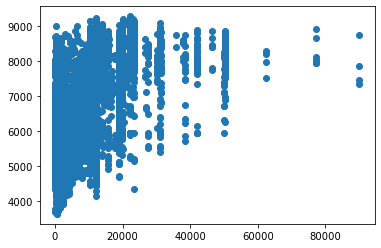

In [84]:
plt.scatter(df['true'], df['pred'])


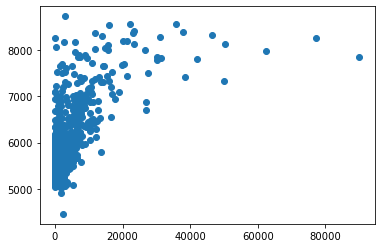

In [85]:
plt.scatter(avg_preds['true'], avg_preds['pred'])
# plt.ylim([0, 500])
# plt.xlim([0, 500])

In [86]:
r2(avg_preds['true'], avg_preds['pred'])

-0.042631891135110234

In [36]:
def mae(real, pred):
    '''
    Calculates MAE of an epoch
    '''
    return abs(real - pred).mean()

In [37]:
mae(avg_preds['true'], avg_preds['pred'])

5355.610191424304

In [38]:
avg_preds['true'].mean()

3019.817384370016

In [39]:
avg_preds['pred'].mean()

6762.001569428811